In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('age_data.xls', skiprows=6)

In [3]:
df

,index,variant,name,notes,country_code,date,0 - 4,5 - 9,10 - 14,15 - 19,...,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 - 89,90 - 94,95 - 99,100+
0,0,Estimates,WORLD,NaN,900,1950,337882.042,269483.463,256773.735,238744.645,...,90098.074,74487.903,56547.867,38290.210,22256.720,13780.037,-,-,-,-
1,0,Estimates,WORLD,NaN,900,1955,399396.699,314555.171,264593.488,252440.981,...,96225.001,79572.416,61579.756,42776.945,25154.463,16080.298,-,-,-,-
2,0,Estimates,WORLD,NaN,900,1960,428985.800,375474.921,309547.900,260005.515,...,108714.338,84758.592,66614.158,47429.458,28724.254,18826.121,-,-,-,-
3,0,Estimates,WORLD,NaN,900,1965,478129.231,407029.063,369935.758,304997.098,...,120431.218,96793.222,71315.339,52241.193,32545.864,22246.660,-,-,-,-
4,0,Estimates,WORLD,NaN,900,1970,520132.469,458395.006,402204.329,365417.301,...,129918.777,108782.729,83367.080,56336.589,36664.755,26745.960,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,259,Estimates,Tonga,NaN,776,1985,13.581,12.087,12.233,12.994,...,2.665,1.911,1.577,0.951,0.591,0.579,-,-,-,-
2696,259,Estimates,Tonga,NaN,776,1990,13.176,13.013,10.951,10.759,...,2.974,2.433,1.652,1.263,0.685,0.600,-,-,-,-
2697,259,Estimates,Tonga,NaN,776,1995,13.448,11.984,13.280,10.538,...,3.000,2.600,1.882,1.257,1.287,0.111,0.163,0.071,0.009,0.001
2698,259,Estimates,Tonga,NaN,776,2000,12.986,12.685,11.855,12.043,...,3.105,2.719,1.916,1.706,0.929,0.823,0.056,0.06,0.017,0.001


In [4]:
df = df.replace('-', 0)

In [5]:
df[list(df.columns[6:])] = df[list(df.columns[6:])].astype('float')

In [6]:
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Checkbox
from IPython.display import display, clear_output

### Демографический профиль

Dropdown(description='Территория:', index=165, options=('AFRICA', 'ASIA', 'Afghanistan', 'Albania', 'Algeria',…

Dropdown(description='Период:', index=11, options=(1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,…

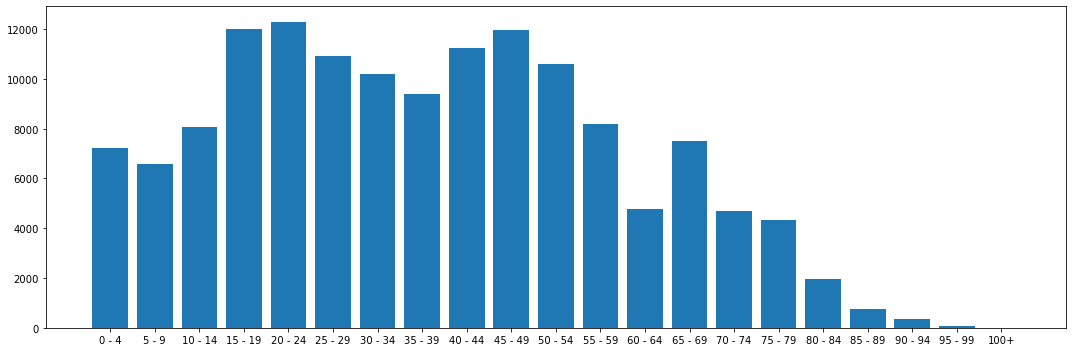

In [7]:
area = Dropdown(
    options=list(sorted(set(df.name))),
    value=list(sorted(set(df.name)))[0], # Выбор по умолчанию
    description='Территория:' 
)
date = Dropdown(
    options=list(sorted(set(df.date))),
    value=list(sorted(set(df.date)))[0], # Выбор по умолчанию
    description='Период:' 
)

display(area, date)

def on_button_clicked(*args):
    clear_output()
    display(area, date)
    
    global filter_country_df
    filter_country_df = df.loc[df.name == area.value]
    filter_df = filter_country_df.loc[filter_country_df.date == int(date.value)]
    bar_df = filter_df[list(filter_df.columns[6:])].transpose()

    plt.figure(figsize = (15, 5))
    plt.subplot(1,1,1)
    plt.bar(bar_df.index, bar_df[list(filter_df.index)[0]].to_list())
    plt.tight_layout()
    plt.show()

area.observe(on_button_clicked, names='value')
date.observe(on_button_clicked, names='value')
on_button_clicked()

In [8]:
name = area.value
name

'Russian Federation'

In [9]:
import numpy as np

### Профили мужчин и женщин

Для прогноза нужно знать коэффициент выживаемости у женщин по каждой возрастной группе, чтобы знать сколько женщин будет в следующих годах.

Поэтому сравним мужской и женский профиль, посчитаем для них коэффициенты выживаемости

In [10]:
male_df = pd.read_excel('age_data.xls', sheet_name='m; 1950-2005, estimates', skiprows=6)
female_df = pd.read_excel('age_data.xls', sheet_name='f; 1950-2005, estimates', skiprows=6)

In [11]:
male_df = male_df.loc[male_df.name == name]
female_df = female_df.loc[female_df.name == name]

In [12]:
male_df = male_df.replace('-', 0)
female_df = female_df.replace('-', 0)

male_df[list(df.columns[6:])] = male_df[list(male_df.columns[6:])].astype('float')
female_df[list(df.columns[6:])] = female_df[list(female_df.columns[6:])].astype('float')

Dropdown(description='Период:', index=11, options=(1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995,…

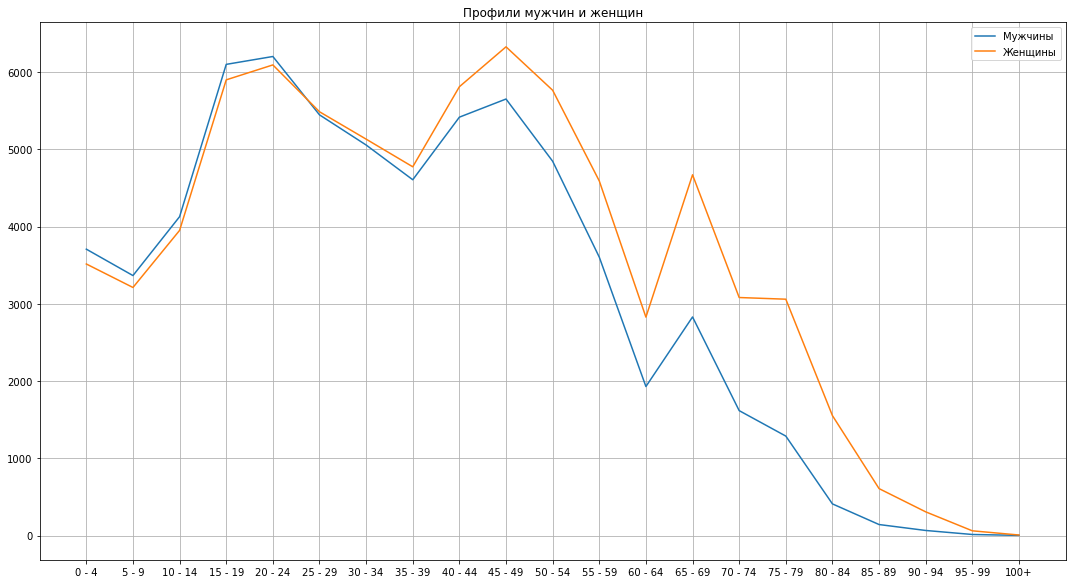

In [13]:
date = Dropdown(
    options=male_df['date'].to_list(),
    value=male_df['date'].to_list()[0], # Выбор по умолчанию
    description='Период:' 
)

display(date)
def survive_plot(*args):
    clear_output()
    display(date)
    
    plt.figure(figsize = (15, 8))
    plt.subplot(1,1,1)
    male = male_df.loc[male_df.date==date.value][male_df.columns[5:]].set_index('date').transpose()
    female = female_df.loc[female_df.date==date.value][female_df.columns[5:]].set_index('date').transpose()
    
    plt.plot(male.index, male[date.value].to_list())
    plt.plot(female.index, female[date.value].to_list())
    plt.legend(['Мужчины', "Женщины"])
    plt.tight_layout()
    plt.title('Профили мужчин и женщин')
    plt.grid()
    plt.show()

date.observe(survive_plot, names='value')
survive_plot()

### Коэффициент выживаемости

In [24]:
def get_survive(df):
    survive = df[df.columns[5:]].set_index('date').transpose()
    for r,d in enumerate(list(survive.columns[:11])):
        list_first = survive[d].to_list()
        list_first.pop()
        list_first.insert(0, survive[survive.columns[r+1]][0])
#         print(np.array(survive[survive.columns[r+1]]), np.array(list_first))
        survive[str(d) + '-' + str(survive.columns[r+1])] = survive[survive.columns[r+1]] / np.array(list_first)
    survive.fillna(0, inplace=True)
    survive.replace(np.inf, 0, inplace = True)
    return survive

In [25]:
female_survive = get_survive(female_df)
survive_df = get_survive(filter_country_df)
male_survive = get_survive(male_df)

Dropdown(description='Период:', index=9, options=('1955-1960', '1960-1965', '1965-1970', '1970-1975', '1975-19…

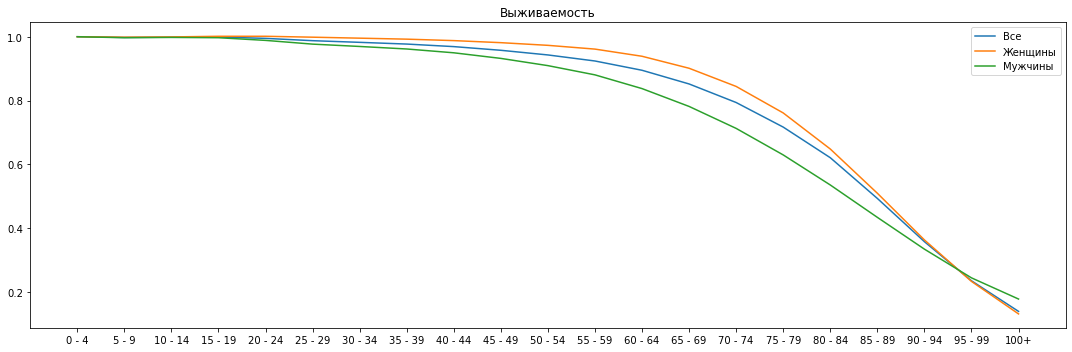

In [26]:
date = Dropdown(
    options=list(survive_df.columns[13:]),
    value=list(survive_df.columns[13:])[0], # Выбор по умолчанию
    description='Период:' 
)

display(date)

def survive_plot(*args):
    clear_output()
    display(date)
    
    plt.figure(figsize = (15, 5))
    plt.subplot(1,1,1)
    plt.plot(survive_df.index, survive_df[date.value])
    plt.plot(female_survive.index, female_survive[date.value])
    plt.plot(male_survive.index, male_survive[date.value])
    plt.title('Выживаемость')
    plt.legend(['Все', "Женщины", "Мужчины"])
    plt.tight_layout()
    plt.show()

date.observe(survive_plot, names='value')
survive_plot()

### Популяционная динамика

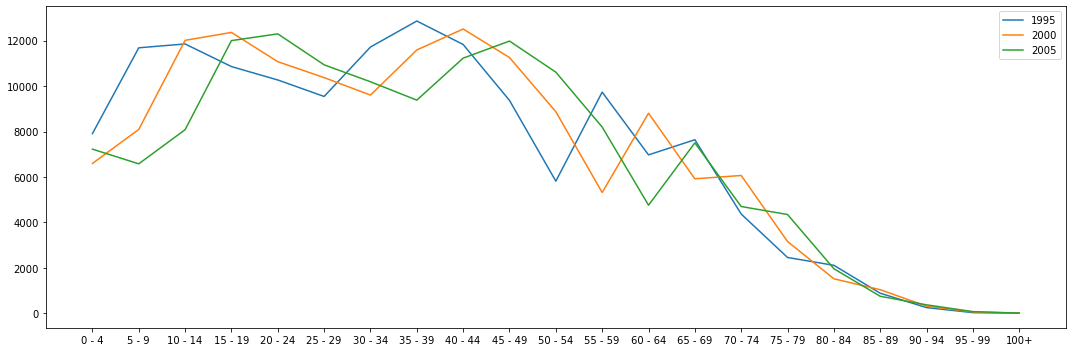

In [27]:
years = []
for y in list(survive_df.columns[:12]):
    year = Checkbox(
        value=False, # Выбор по умолчанию
        description=str(y),    
    )
    years.append(year)
    
from ipywidgets import Button, HBox, VBox

left_box = HBox(years[:int(len(years)/2)])
right_box = HBox(years[int(len(years)/2):])
w = VBox([left_box, right_box])
display(w)

def survive_plot(*args):
    clear_output()
    display(w)
    plt.figure(figsize = (15, 5))
    plt.subplot(1,1,1)
    legend = []
    for y in years:
        if y.value:
            legend.append(int(y.description))
            plt.plot(survive_df.index, survive_df[int(y.description)])
            plt.legend(legend)
    plt.tight_layout()
    plt.show()

for y in years:
    y.observe(survive_plot)

### Коэффициент фертильности

In [28]:
columns=['20 - 24','25 - 29','30 - 34','35 - 39']

In [29]:
F = np.array(survive_df.loc['0 - 4', ][:12])/ np.array(female_df[columns].sum(axis = 1))
FM = np.array(male_survive.loc['0 - 4', ][:12])/ np.array(female_df[columns].sum(axis = 1))
FF = np.array(female_survive.loc['0 - 4', ][:12])/ np.array(female_df[columns].sum(axis = 1))

F.mean(),  FM.mean(), FF.mean()

(0.4941764031866431, 0.2524650414027786, 0.24171136178386435)

Мальчиков рождается больше, чем девочек

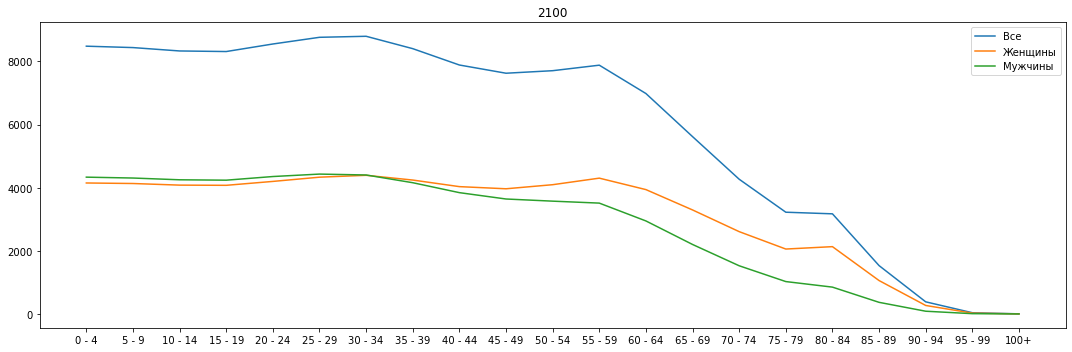

In [36]:
import time
def get_next_year(year, next_year):
    
    clear_output()
    
    survive_df[next_year], female_survive[next_year], male_survive[next_year] = 0, 0, 0

    survive_df.loc[1:, next_year] = np.array(survive_df[year][:-1]) * np.array(survive_df['avg_survival'][1:])
    female_survive.loc[1:, next_year] = np.array(female_survive[year][:-1]) * np.array(female_survive['avg_survival'][1:])
    male_survive.loc[1:, next_year] = np.array(male_survive[year][:-1]) * np.array(male_survive['avg_survival'][1:])
    
    female_survive[next_year][0] = sum(female_survive[next_year][4:8])*FF.mean()
    survive_df[next_year][0] = sum(female_survive[next_year][4:8])*F.mean()
    male_survive[next_year][0] = sum(female_survive[next_year][4:8])*FM.mean()
    
    plt.figure(figsize = (15, 5))
    plt.subplot(1,1,1)
    plt.title(str(next_year))
    plt.plot(survive_df.index, survive_df[next_year])
    plt.plot(female_survive.index, female_survive[next_year])
    plt.plot(male_survive.index, male_survive[next_year])
    plt.legend(['Все', "Женщины", "Мужчины"])
    plt.tight_layout()
    plt.show()
    
    time.sleep(1)
    
    if next_year!=2100:
        get_next_year(next_year, next_year+5)
    
    return
    
survive_df['avg_survival'] = survive_df[survive_df.columns[12:23]].mean(axis=1)
survive_df['avg_survival'][-4:] = survive_df[survive_df.columns[20:23]][-4:].mean(axis=1)
female_survive['avg_survival'] = female_survive[female_survive.columns[12:23]].mean(axis=1)
female_survive['avg_survival'][-4:] = female_survive[female_survive.columns[20:23]][-4:].mean(axis=1)
male_survive['avg_survival'] = male_survive[male_survive.columns[12:23]].mean(axis=1)
male_survive['avg_survival'][-4:] = male_survive[male_survive.columns[20:23]][-4:].mean(axis=1)

year = survive_df.columns[11]
next_year = year+5

get_next_year(year, next_year)

### Проверка данных

In [37]:
from_data = [5915.309,6292.454,6330.239,6095.408,5940.03,6180.928,6757.582,7223.002,7280.114,6558.771,5766.129,6657.65,9007.454,8224.939,6254.304,4679.667,3046.354,2153.642, 1053.703,293.389,41.101]

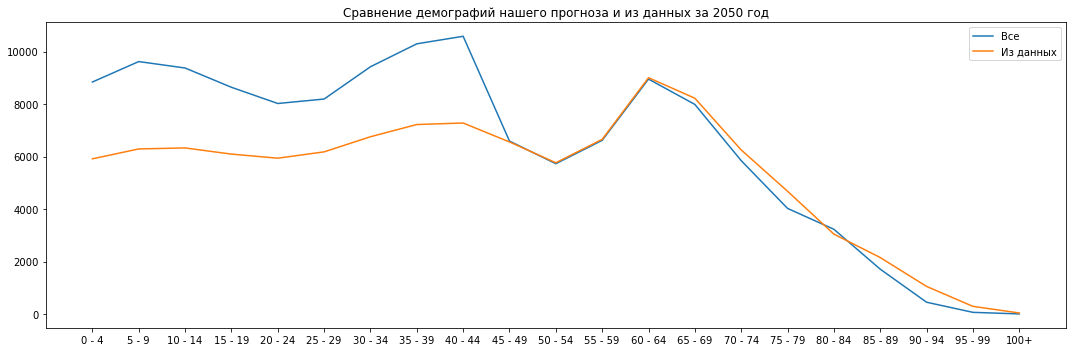

In [38]:
plt.figure(figsize = (15, 5))
plt.subplot(1,1,1)
plt.title("Сравнение демографий нашего прогноза и из данных за 2050 год")
plt.plot(survive_df.index, survive_df[2050])
plt.plot(survive_df.index, from_data)
plt.legend(['Все', "Из данных"])
plt.tight_layout()
plt.show()

### Переход к шагу 1 год

In [39]:
def get_survive_year(survive):
    for r,d in enumerate(survive.columns[:-1]):
        list_first = survive[d].to_list()
        list_first.pop()
        list_first.insert(0, survive[survive.columns[r+1]][0])
        survive[str(d) + '-' + str(survive.columns[r+1])] = survive[survive.columns[r+1]] / list_first
    survive.fillna(0, inplace=True)
    survive.replace(np.inf, 0, inplace = True)
    
def fill_children(df):
    for y in range(1950, 2005, 5):
        FF = (df[y][0]/sum(df[y][20:40]) + df[y+5][0]/sum(df[y+5][20:40]))/2
        
        for x in range(1,5):
            df[y+x][0] = sum(df[y+x][20:40])*FF
            delta = (df[y+5][5-x]-df[y+x][0])/(5-x)
            
            for i in range(1, 5-x):
                df[y+x+i][i] = delta*i+df[y+x][0]
                
def make_df_by_year(df):
    
    new_df = pd.DataFrame()
    
    for c in df.columns:
        values = []
        [values.append(x/5) for x in df[c] for k in range(0,5)]
        new_df[c] = values[:-4]
    
    for c in df.columns[:-1]:
        list_delta = list(map( lambda x, y: (x-y)/5, new_df[c+5][5:].to_list(), new_df[c][:-5].to_list()))
        
        for x in range(1,5):
            new_df[c+x] =  np.nan
            new_df[c+x][x:x-5] = list(map( lambda x, y: x+y, new_df[c+x-1][x-1:x-6].to_list(),list_delta))
        
    fill_children(new_df)
    new_df.fillna(0, inplace = True)
    new_df = new_df[new_df.columns[new_df.columns.isin(range(1950,2006))].sort_values()]
    get_survive_year(new_df)
    
    return new_df


survive_df_new = make_df_by_year(survive_df[survive_df.columns[:12]])
female_df_new = make_df_by_year(female_survive[female_survive.columns[:12]])
male_df_new = make_df_by_year(male_survive[male_survive.columns[:12]])

In [40]:
survive_df_new

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,1995-1996,1996-1997,1997-1998,1998-1999,1999-2000,2000-2001,2001-2002,2002-2003,2003-2004,2004-2005
0,2008.1308,2232.653242,2251.776800,2271.424254,2291.595605,2527.3504,2498.264191,2578.587689,2658.984734,2739.455325,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2008.1308,2006.721960,2306.327532,2343.634667,2399.387327,2527.3504,2522.774560,2546.819793,2616.553993,2675.735667,...,1.004666,0.975416,0.969958,0.958637,0.923820,0.999530,1.012026,1.015954,1.023522,1.045649
2,2008.1308,2006.721960,2005.313120,2380.001821,2435.492533,2527.3504,2522.774560,2518.198720,2595.375395,2654.520296,...,1.004666,1.004644,0.974796,0.969027,0.956852,0.999530,0.999530,1.011883,1.015704,1.022982
3,2008.1308,2006.721960,2005.313120,2003.904280,2453.676111,2527.3504,2522.774560,2518.198720,2513.622880,2643.930998,...,1.004666,1.004644,1.004622,0.974144,0.968037,0.999530,0.999530,0.999530,1.011743,1.015461
4,2008.1308,2006.721960,2005.313120,2003.904280,2002.495440,2527.3504,2522.774560,2518.198720,2513.622880,2509.047040,...,1.004666,1.004644,1.004622,1.004601,0.973458,0.999530,0.999530,0.999530,0.999529,1.011607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.832446,0.819025,0.779037,0.716363,0.604060,0.827926,0.819489,0.779728,0.717501,0.606274
97,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.798720,0.779037,0.716363,0.604060,0.000000,0.792163,0.779728,0.717501,0.606274
98,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.747997,0.716363,0.604060,0.000000,0.000000,0.737633,0.717501,0.606274
99,0.0000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.663097,0.604060,0.000000,0.000000,0.000000,0.644313,0.606274


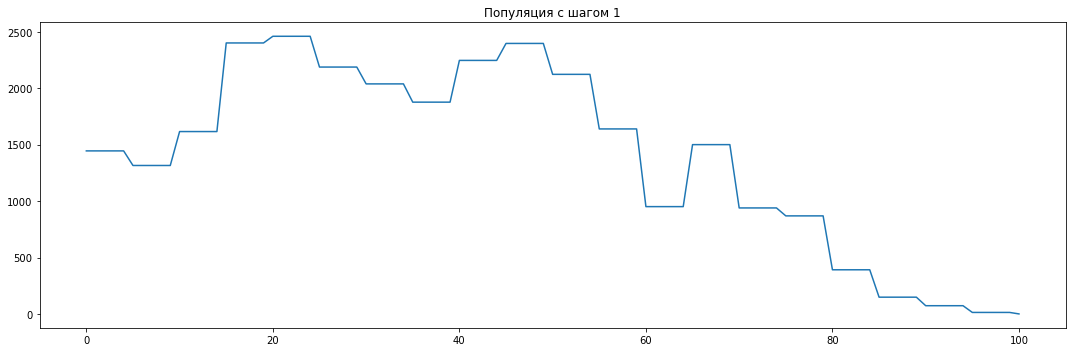

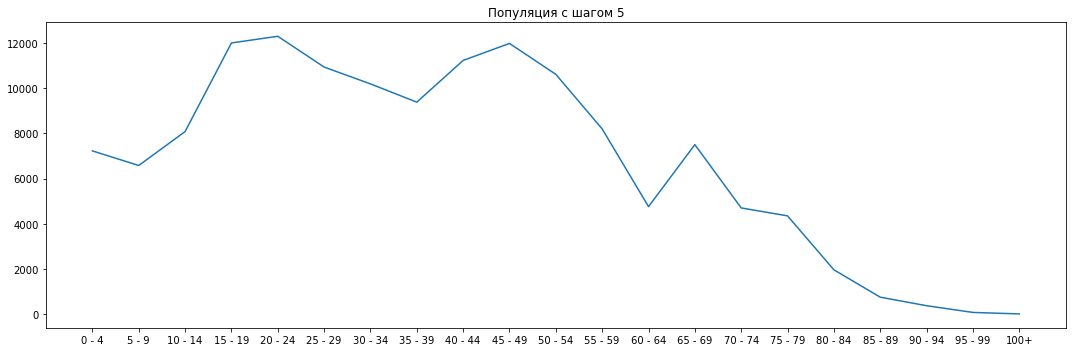

In [41]:
plt.figure(figsize = (15, 5))
plt.subplot(1,1,1)
plt.title("Популяция с шагом 1")
plt.plot(survive_df_new.index, survive_df_new[2005])
plt.tight_layout()
plt.show()
plt.figure(figsize = (15, 5))
plt.subplot(1,1,1)
plt.title("Популяция с шагом 5")
plt.plot(survive_df.index, survive_df[2005])
plt.tight_layout()
plt.show()

In [42]:
F = np.array(survive_df_new.loc[0,][:56])/ np.array(female_df_new.loc[20:40,].sum()[:56])
FM = np.array(male_df_new.loc[0,][:56])/ np.array(female_df_new.loc[20:40,].sum()[:56])
FF = np.array(female_df_new.loc[0,][:56])/ np.array(female_df_new.loc[20:40,].sum()[:56])

F.mean(),  FM.mean(), FF.mean()

(0.09520444580454542, 0.04861612823054467, 0.04660485385425539)

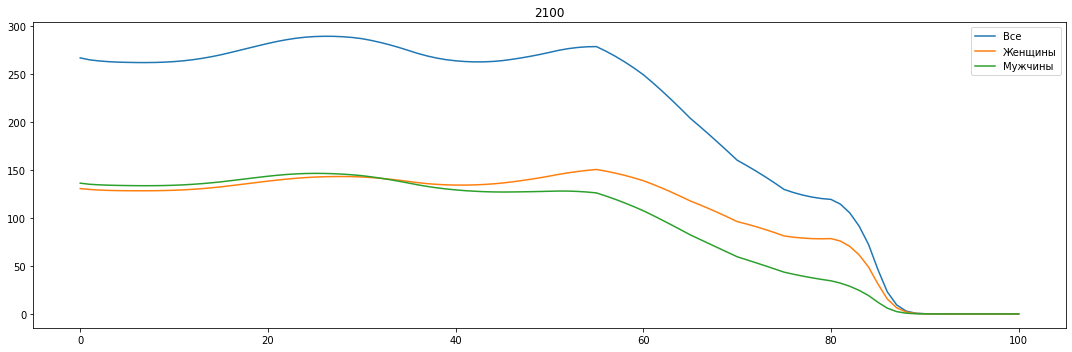

In [44]:
import time
def get_next_year(year, next_year):
    
    clear_output()
    
    survive_df_new[next_year], female_df_new[next_year], male_df_new[next_year] = 0, 0, 0
    
    survive_df_new.loc[1:, next_year] = np.array(survive_df_new[year][:-1]) * np.array(survive_df_new['avg_survival'][1:])
    female_df_new.loc[1:, next_year] = np.array(female_df_new[year][:-1]) * np.array(female_df_new['avg_survival'][1:])
    male_df_new.loc[1:, next_year]= np.array(male_df_new[year][:-1]) * np.array(male_df_new['avg_survival'][1:])
    
    female_df_new.loc[0, next_year] = sum(female_df_new[next_year][20:40])*FF.mean()
    survive_df_new.loc[0, next_year] = sum(female_df_new[next_year][20:40])*F.mean()
    male_df_new.loc[0, next_year] = sum(female_df_new[next_year][20:40])*FM.mean()
    
    plt.figure(figsize = (15, 5))
    plt.subplot(1,1,1)
    plt.title(str(next_year))
    plt.plot(survive_df_new.index, survive_df_new[next_year])
    plt.plot(female_df_new.index, female_df_new[next_year])
    plt.plot(male_df_new.index, male_df_new[next_year])
    plt.legend(['Все', "Женщины", "Мужчины"])
    plt.tight_layout()
    plt.show()
    
    time.sleep(1)
    
    if next_year!=2100:
        get_next_year(next_year, next_year+1)
    
    return
    
survive_df_new['avg_survival'] = survive_df_new[survive_df_new.columns[56:]].mean(axis=1)
female_df_new['avg_survival'] = female_df_new[female_df_new.columns[56:]].mean(axis=1)
male_df_new['avg_survival'] = male_df_new[male_df_new.columns[56:]].mean(axis=1)

year = survive_df_new.columns[55]
next_year = year+1

get_next_year(year, next_year)

### Проверка

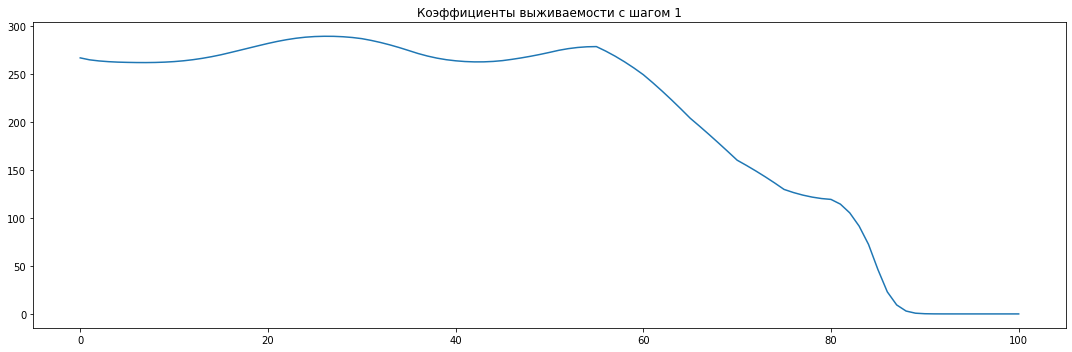

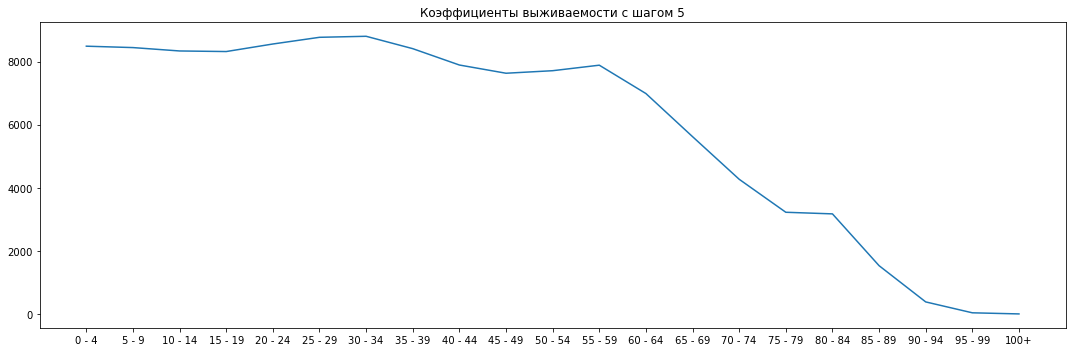

In [45]:
plt.figure(figsize = (15, 5))
plt.subplot(1,1,1)
plt.title("Коэффициенты выживаемости с шагом 1")
plt.plot(survive_df_new.index, survive_df_new[2100])
plt.tight_layout()
plt.show()
plt.figure(figsize = (15, 5))
plt.subplot(1,1,1)
plt.title("Коэффициенты выживаемости с шагом 5")
plt.plot(survive_df.index, survive_df[2100])
plt.tight_layout()
plt.show()